In [29]:
import pandas as pd
import numpy as np 
import os
import matplotlib
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score, make_scorer, accuracy_score
from xgboost import XGBClassifier, plot_importance
import math

In [ ]:
main_df = pd.read_csv(os.path.join('data', 'unpacked_genres.csv')).drop('Unnamed: 0', axis=1)

In [ ]:
lang_df = pd.read_csv(os.path.join('data', 'languages_parsed.csv')).drop('Unnamed: 0', axis=1)

In [ ]:
main_df.head()

In [ ]:
lang_df.columns

In [ ]:
main_df['id'] = main_df['id'].astype('str')
lang_df['id'] = lang_df['id'].astype('str')
lang_df = lang_df[['id', u'numlang', u'cn', u'da', u'de',
       u'en', u'es', u'fr', u'hi', u'it', u'ja', u'ko', u'ml', u'ru', u'ta',
       u'zh']]

In [ ]:
all_df = pd.merge(main_df, lang_df, on='id')

In [ ]:
all_df.columns

In [ ]:
all_df.to_csv(os.path.join('data', 'final.csv'))

In [ ]:
all_df = all_df.drop(['production_countries', 'spoken_languages', 'original_language'], axis=1)

In [ ]:
all_df.to_csv(os.path.join('data', 'final.csv'))

In [ ]:
all_df.head()

In [ ]:
all_df.drop('original_language', axis=1).to_csv(os.path.join('data', 'final.csv'))

In [2]:
df = pd.read_csv(os.path.join('data', 'final.csv'))

In [3]:
X = df.drop(['revenue', 'id', 'likes', 'dislikes'], axis=1)
y = df.revenue

In [4]:
reg = XGBRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
reg.fit(X_train, y_train)
print(math.sqrt(mean_squared_error(y_test, reg.predict(X_test))))

114498833.086


In [6]:
print(reg.predict(df[df['id'] == 862].drop(['id', 'revenue'], axis=1)))

ValueError: feature_names mismatch: [u'budget', u'runtime', u'views', u'n_trailers', u'daysSinceStart', u'dayInYear', u'Mystery', u'Romance', u'Family', u'Science Fiction', u'Horror', u'Crime', u'Drama', u'Fantasy', u'Western', u'Animation', u'Music', u'Adventure', u'Foreign', u'Action', u'TV Movie', u'Comedy', u'Documentary', u'War', u'Thriller', u'History', u'numlang', u'cn', u'da', u'de', u'en', u'es', u'fr', u'hi', u'it', u'ja', u'ko', u'ml', u'ru', u'ta', u'zh'] [u'budget', u'runtime', u'views', u'likes', u'dislikes', u'n_trailers', u'daysSinceStart', u'dayInYear', u'Mystery', u'Romance', u'Family', u'Science Fiction', u'Horror', u'Crime', u'Drama', u'Fantasy', u'Western', u'Animation', u'Music', u'Adventure', u'Foreign', u'Action', u'TV Movie', u'Comedy', u'Documentary', u'War', u'Thriller', u'History', u'numlang', u'cn', u'da', u'de', u'en', u'es', u'fr', u'hi', u'it', u'ja', u'ko', u'ml', u'ru', u'ta', u'zh']
training data did not have the following fields: dislikes, likes

In [7]:
X.columns

Index([u'budget', u'runtime', u'views', u'n_trailers', u'daysSinceStart',
       u'dayInYear', u'Mystery', u'Romance', u'Family', u'Science Fiction',
       u'Horror', u'Crime', u'Drama', u'Fantasy', u'Western', u'Animation',
       u'Music', u'Adventure', u'Foreign', u'Action', u'TV Movie', u'Comedy',
       u'Documentary', u'War', u'Thriller', u'History', u'numlang', u'cn',
       u'da', u'de', u'en', u'es', u'fr', u'hi', u'it', u'ja', u'ko', u'ml',
       u'ru', u'ta', u'zh'],
      dtype='object')

In [8]:
Xp = X.drop([u'cn',
       u'da', u'de', u'es', u'fr', u'hi', u'it', u'ja', u'ko', u'ml',
       u'ru', u'ta', u'zh'], axis=1)

In [9]:
Xp.head()

,budget,runtime,views,n_trailers,daysSinceStart,dayInYear,Mystery,Romance,Family,Science Fiction,...,Foreign,Action,TV Movie,Comedy,Documentary,War,Thriller,History,numlang,en
0,30000000,81.0,8050136,3,29484,302,0,0,1,0,...,0,0,0,1,0,0,0,0,1.0,1
1,65000000,104.0,83048,1,29530,348,0,0,1,0,...,0,0,0,0,0,0,0,0,2.0,1
2,16000000,127.0,104948,1,29537,355,0,1,0,0,...,0,0,0,1,0,0,0,0,1.0,1
3,60000000,170.0,32419,1,29530,348,0,0,0,0,...,0,1,0,0,0,0,1,0,2.0,1
4,35000000,106.0,6162,2,29537,355,0,0,0,0,...,0,1,0,0,0,0,1,0,1.0,1


In [10]:
reg = XGBRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
reg.fit(X_train, y_train)
print(math.sqrt(mean_squared_error(y_test, reg.predict(X_test))))

107341968.205


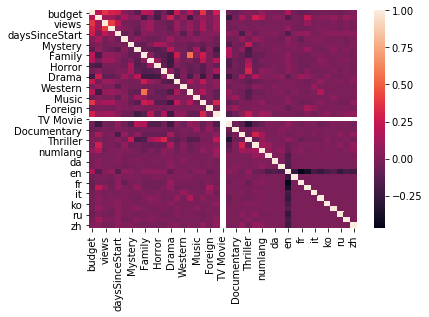

In [12]:
import seaborn as sns
sns.heatmap(X.corr())

In [13]:
df.columns

Index([u'budget', u'id', u'revenue', u'runtime', u'views', u'likes',
       u'dislikes', u'n_trailers', u'daysSinceStart', u'dayInYear', u'Mystery',
       u'Romance', u'Family', u'Science Fiction', u'Horror', u'Crime',
       u'Drama', u'Fantasy', u'Western', u'Animation', u'Music', u'Adventure',
       u'Foreign', u'Action', u'TV Movie', u'Comedy', u'Documentary', u'War',
       u'Thriller', u'History', u'numlang', u'cn', u'da', u'de', u'en', u'es',
       u'fr', u'hi', u'it', u'ja', u'ko', u'ml', u'ru', u'ta', u'zh'],
      dtype='object')

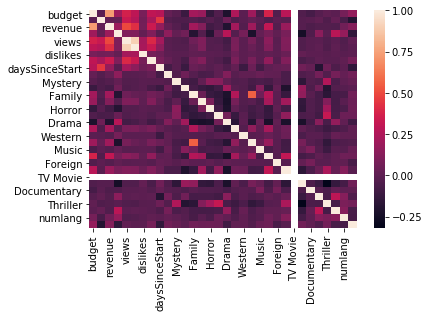

In [14]:
sns.heatmap(df.drop([u'cn', u'da', u'de', u'es',
       u'fr', u'hi', u'it', u'ja', u'ko', u'ml', u'ru', u'ta', u'zh'], axis=1).corr())

In [ ]:
df.revenue.hist()

In [ ]:
profit = []
for i in range(len(df)):
    profit.append(df['revenue'][i] - df['budget'][i])

In [ ]:
df['profit'] = profit

In [ ]:
len(df[df['profit'] < 0])

In [ ]:
isProfitable = []
for i in range(len(df)):
    isProfitable.append(df['profit'][i] > 0)
df['isProfitable'] = isProfitable

In [20]:
df = pd.read_csv(os.path.join('data', 'final_clf.csv')).drop('Unnamed: 0', axis=1)

In [21]:
X = df.drop(['id', 'revenue', 'TV Movie', 'profit', 'isProfitable'], axis=1)
y = df.isProfitable.astype('int')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = XGBClassifier()

In [23]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7365028203062046

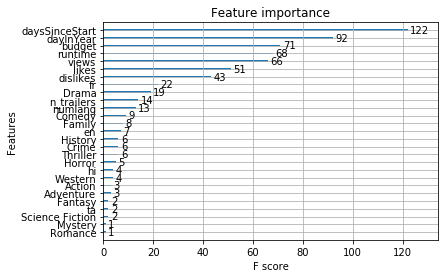

In [24]:
plot_importance(clf)
plt.show()

In [25]:
roc_auc_score(y_test, np.array(clf.predict_proba(X_test))[:,1])

0.7596063968460878

In [27]:
roc_auc_score(y, np.array(clf.predict_proba(X))[:,1])

0.8119721902530743

In [28]:
from sklearn.model_selection import GridSearchCV

In [30]:
all_df.head()

,adult,budget,id,original_language,revenue,runtime,views,likes,dislikes,n_trailers,...,es,fr,hi,it,ja,ko,ml,ru,ta,zh
0,False,30000000,862,en,373554033.0,81.0,8050136,6330,1965,3,...,0,0,0,0,0,0,0,0,0,0
1,False,65000000,8844,en,262797249.0,104.0,83048,70,14,1,...,0,0,0,0,0,0,0,0,0,0
2,False,16000000,31357,en,81452156.0,127.0,104948,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,False,60000000,949,en,187436818.0,170.0,32419,119,1,1,...,0,0,0,0,0,0,0,0,0,0
4,False,35000000,9091,en,64350171.0,106.0,6162,12,3,2,...,0,0,0,0,0,0,0,0,0,0


In [20]:
all_df.drop('original_language', axis=1).to_csv(os.path.join('data', 'final.csv'))

In [59]:
df = pd.read_csv(os.path.join('data', 'final.csv'))

In [61]:
X = df.drop(['revenue', 'id', 'likes', 'dislikes'], axis=1)
y = df.revenue

In [62]:
reg = XGBRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [63]:
reg.fit(X_train, y_train)
print(math.sqrt(mean_squared_error(y_test, reg.predict(X_test))))

103448983.253


In [60]:
print(reg.predict(df[df['id'] == 862].drop(['id', 'revenue'], axis=1)))

[2.0252707e+08]


In [64]:
X.columns

Index([u'budget', u'runtime', u'views', u'n_trailers', u'daysSinceStart',
       u'dayInYear', u'Mystery', u'Romance', u'Family', u'Science Fiction',
       u'Horror', u'Crime', u'Drama', u'Fantasy', u'Western', u'Animation',
       u'Music', u'Adventure', u'Foreign', u'Action', u'TV Movie', u'Comedy',
       u'Documentary', u'War', u'Thriller', u'History', u'numlang', u'cn',
       u'da', u'de', u'en', u'es', u'fr', u'hi', u'it', u'ja', u'ko', u'ml',
       u'ru', u'ta', u'zh'],
      dtype='object')

In [65]:
Xp = X.drop([u'cn',
       u'da', u'de', u'es', u'fr', u'hi', u'it', u'ja', u'ko', u'ml',
       u'ru', u'ta', u'zh'], axis=1)

In [66]:
Xp.head()

,budget,runtime,views,n_trailers,daysSinceStart,dayInYear,Mystery,Romance,Family,Science Fiction,...,Foreign,Action,TV Movie,Comedy,Documentary,War,Thriller,History,numlang,en
0,30000000,81.0,8050136,3,29484,302,0,0,1,0,...,0,0,0,1,0,0,0,0,1.0,1
1,65000000,104.0,83048,1,29530,348,0,0,1,0,...,0,0,0,0,0,0,0,0,2.0,1
2,16000000,127.0,104948,1,29537,355,0,1,0,0,...,0,0,0,1,0,0,0,0,1.0,1
3,60000000,170.0,32419,1,29530,348,0,0,0,0,...,0,1,0,0,0,0,1,0,2.0,1
4,35000000,106.0,6162,2,29537,355,0,0,0,0,...,0,1,0,0,0,0,1,0,1.0,1


In [67]:
reg = XGBRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

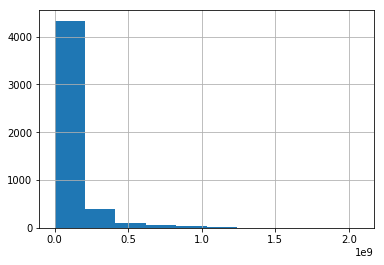

In [68]:
df.revenue.hist()

In [77]:
profit = []
for i in range(len(df)):
    profit.append(df['revenue'][i] - df['budget'][i])

In [79]:
df['profit'] = profit

In [80]:
grid_params = {
    'max_depth': range(5, 15, 3),
    'n_estimators': range(50, 200, 25)
}
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
clf = GridSearchCV(XGBClassifier(), param_grid=grid_params, scoring=scoring, cv=5, refit='AUC')
clf.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 75, 100, 125, 150, 175], 'max_depth': [5, 8, 11, 14]},
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score='warn',
       scoring={'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)},
       verbose=0)

In [31]:
best_clf = clf.best_estimator_

In [32]:
df.columns

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [104]:
X = df.drop(['id', 'revenue', 'TV Movie', 'profit', 'isProfitable'], axis=1)
y = df.isProfitable.astype('int')

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = XGBClassifier()

In [33]:
roc_auc_score(y, np.array(best_clf.predict_proba(X))[:,1])

0.8606892298739943

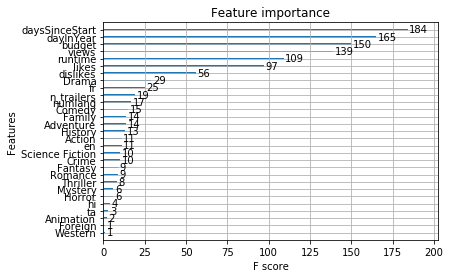

In [34]:
plot_importance(best_clf)
plt.show()

In [35]:
from xgboost import plot_tree

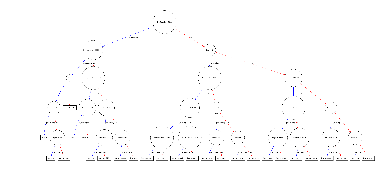

In [38]:
df.daysSinceStart.plot.hist()

In [120]:
df['isProfitable'] = df['isProfitable'].astype('int')

In [122]:
len(df[df['isProfitable'] == 0])

1421

In [123]:
1421.0/(len(df)-1421.0)

0.4012990680598701

In [130]:
df.to_csv(os.path.join('data', 'final_clf.csv'))